In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [63]:
header = ['sex', 'size1', 'size2', 'size3', 'weight1', 'weight2', 'weight3', 'weight4', 'class']
train = pd.read_csv('train.csv', header = None, names = header)
train.head()

,sex,size1,size2,size3,weight1,weight2,weight3,weight4,class
0,M,3.1110,2.4990,0.8160,5.8446,3.044700,NaN,1.992463,8
1,M,2.3715,1.8360,0.5355,2.1981,1.222069,0.545700,NaN,9
2,M,2.4990,2.0145,0.7140,2.7999,1.129650,0.650250,0.765000,11
3,M,3.2130,2.5245,0.8160,5.5743,2.534700,1.127100,1.606500,12
4,M,2.9325,2.2185,0.6885,5.0592,2.203200,1.254302,NaN,10


In [64]:
print('Shape : ', train.shape[0], 'rows x', train.shape[1], 'columns')
train.info()

Shape :  10579 rows x 9 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10579 entries, 0 to 10578
Data columns (total 9 columns):
sex        10579 non-null object
size1      10047 non-null float64
size2      10051 non-null float64
size3      10044 non-null float64
weight1    10055 non-null float64
weight2    10053 non-null float64
weight3    10073 non-null float64
weight4    10019 non-null float64
class      10579 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 702.6+ KB


In [65]:
train['class'] = train['class'].astype(str)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10579 entries, 0 to 10578
Data columns (total 9 columns):
sex        10579 non-null object
size1      10047 non-null float64
size2      10051 non-null float64
size3      10044 non-null float64
weight1    10055 non-null float64
weight2    10053 non-null float64
weight3    10073 non-null float64
weight4    10019 non-null float64
class      10579 non-null object
dtypes: float64(7), object(2)
memory usage: 661.2+ KB


In [66]:
train.describe(include = 'all')

,sex,size1,size2,size3,weight1,weight2,weight3,weight4,class
count,10579,10047.000000,10051.000000,10044.000000,10055.000000,10053.000000,10073.000000,10019.000000,10579
unique,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
freq,3979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2213
mean,NaN,2.799411,2.191942,0.767054,4.472830,2.005374,1.008515,1.296961,NaN
std,NaN,0.528414,0.443913,0.235189,2.332749,1.107274,0.544529,0.641090,NaN
min,NaN,1.045500,0.790500,0.000000,0.216750,0.086700,0.028050,0.079050,NaN
25%,NaN,2.422500,1.887000,0.637500,2.629050,1.129650,0.586500,0.793050,NaN
50%,NaN,2.856000,2.244000,0.765000,4.278900,1.881900,0.938400,1.249500,NaN
75%,NaN,3.187500,2.499000,0.892500,6.002700,2.703000,1.351500,1.708500,NaN


c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


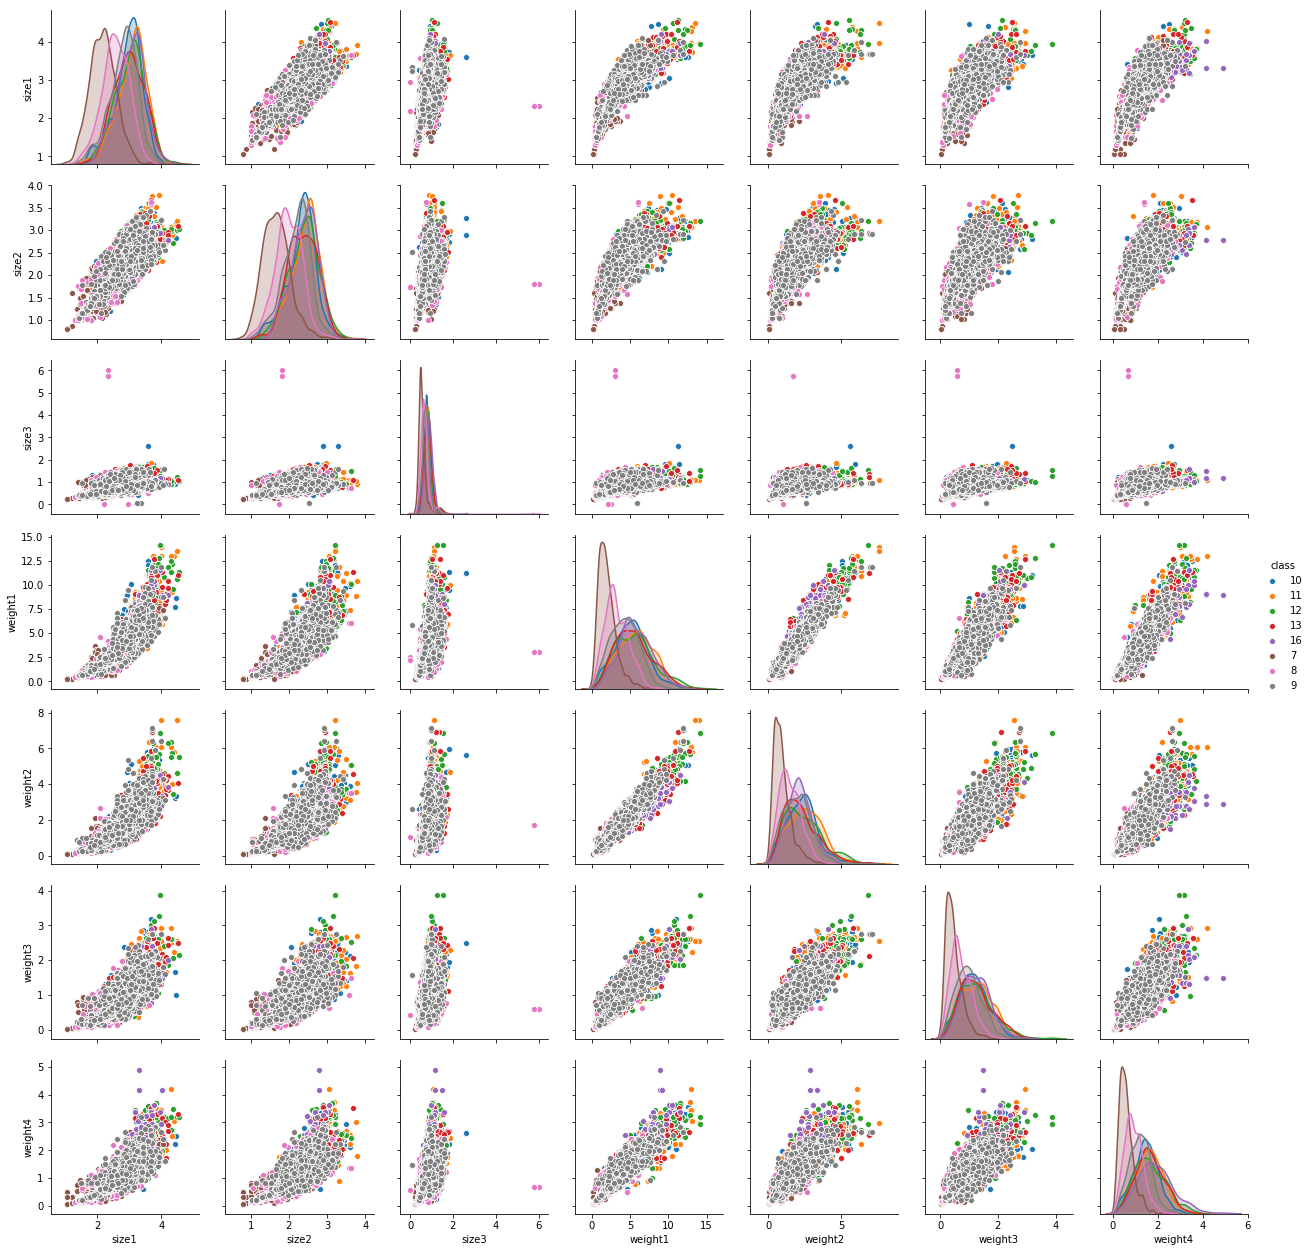

In [67]:
sns.pairplot(train, vars = train.columns[1:8], hue = 'class')
sns.despine()

Lets see how values are correlated

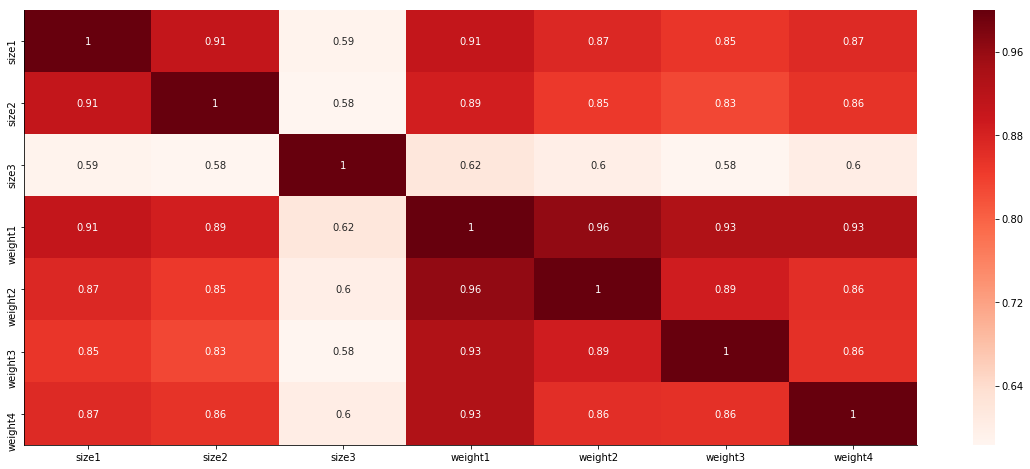

In [68]:
fig, ax = plt.subplots(figsize = (20,8))
sns.heatmap(train.corr(), cmap = 'Reds', annot = True, ax = ax)
sns.despine()

It would ne useful to see the distribution of classes

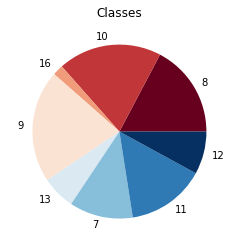

In [69]:
classes = list(set(train['class']))
freqs = [len(train[train['class'] == val])/ len(train) for val in classes]
series = pd.Series(freqs, index = classes ,name = 'Classes')
series.plot(kind = 'pie', colormap = 'RdBu', label = '', title = 'Classes')
plt.show()

Lets see how many rows do we lose if we drop any with a Nan

In [70]:
df1 = train.dropna(axis = 'rows', how = 'any')
df1.shape

(7377, 9)

Too bad, replacing 1st column with mode and others with the mean is better

In [71]:
train['sex'] = train['sex'].replace(np.nan, train['sex'].mode())
for col in train.columns[1:8]:
    train[col] = train[col].replace(np.nan, train[col].mean())
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10579 entries, 0 to 10578
Data columns (total 9 columns):
sex        10579 non-null object
size1      10579 non-null float64
size2      10579 non-null float64
size3      10579 non-null float64
weight1    10579 non-null float64
weight2    10579 non-null float64
weight3    10579 non-null float64
weight4    10579 non-null float64
class      10579 non-null object
dtypes: float64(7), object(2)
memory usage: 661.2+ KB


We could see that size1, weight1, weight3 largely correlates with all others, so lets drop them

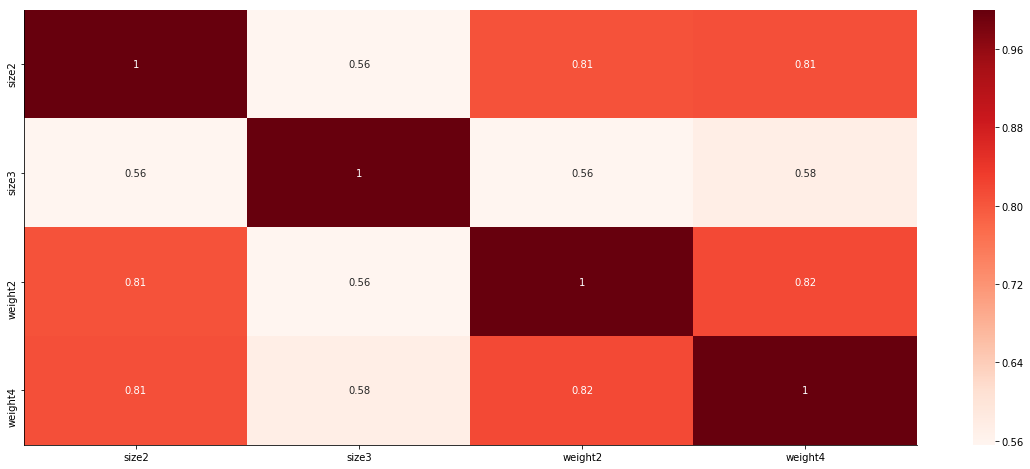

In [72]:
train = train.drop(labels = ['size1', 'weight1', 'weight3'], axis = 1)
fig, ax = plt.subplots(figsize = (20,8))
sns.heatmap(train.corr(), cmap = 'Reds', annot = True, ax = ax)
sns.despine()

Things got better

Lets normalize our data

In [75]:
from sklearn import preprocessing

x = train[train.columns[1:5]].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train[train.columns[1:5]] = pd.DataFrame(x_scaled)
train.describe(include = 'all')

,sex,size2,size3,weight2,weight4,class
count,10579,10579.000000,10579.000000,10579.000000,10579.000000,10579
unique,5,NaN,NaN,NaN,NaN,8
top,M,NaN,NaN,NaN,NaN,9
freq,3979,NaN,NaN,NaN,NaN,2213
mean,NaN,0.469373,0.127681,0.255752,0.252819,NaN
std,NaN,0.144918,0.038146,0.143879,0.129510,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,0.375782,0.106116,0.145819,0.155096,NaN
50%,NaN,0.469727,0.127339,0.248810,0.252819,NaN
75%,NaN,0.572213,0.144318,0.341264,0.331631,NaN


Inspecting the outliers

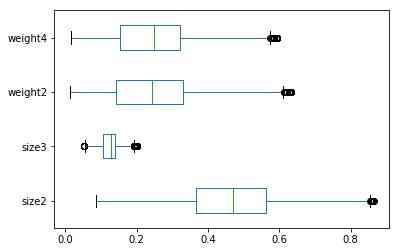

In [84]:
train[train.columns[1:5]].plot(kind = "box", vert = False)
plt.show()

In [85]:
# IQR method
Q1 = train[train.columns[1:5]].quantile(0.25)
Q3 = train[train.columns[1:5]].quantile(0.75)
IQR = Q3 - Q1

train_new = train.copy()
for col in IQR.index:
    train_new.drop(train_new[(train_new[col] > Q3[col] + 1.5*IQR[col]) | (train_new[col] < Q1[col] - 1.5*IQR[col])].index, 
                                                               axis = 0, inplace = True)

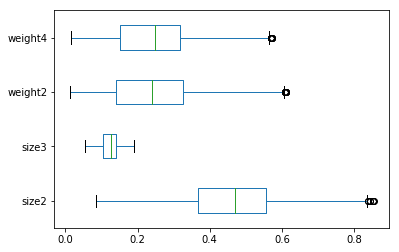

In [86]:
train_new[train.columns[1:5]].plot(kind = "box", vert = False)
plt.show()

In [88]:
train = train_new
print('Shape : ', train.shape[0], 'rows x', train.shape[1], 'columns')
train.info()

Shape :  9775 rows x 6 columns
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9775 entries, 0 to 10578
Data columns (total 6 columns):
sex        9775 non-null object
size2      9775 non-null float64
size3      9775 non-null float64
weight2    9775 non-null float64
weight4    9775 non-null float64
class      9775 non-null object
dtypes: float64(4), object(2)
memory usage: 458.2+ KB


In [89]:
def zoo_score(train, zoo):
    X,y = train.iloc[:,1:], train.iloc[:,0]
    for clf, name in zoo:
        print(name, ':', np.mean(cross_val_score(clf, X, y, cv = 4, scoring = 'f1')))

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.decomposition import PCA

In [98]:
train , test = train_test_split(train)
zoo = [(LogisticRegression(), "LR"), 
       (DecisionTreeClassifier(max_depth = 10), "Tree"), 
       (RandomForestClassifier(n_estimators = 10, max_depth = 10), "RF"), 
       (ExtraTreesClassifier(n_estimators = 10, max_depth = 10), "ExtraTrees"), 
       (SVC(), "SVM")]
def select_best(train, zoo):
    X,y = train.iloc[:,1:5], train.iloc[:,5]
    score_dict = {}
    for clf, name in zoo:
        score = np.mean(cross_val_score(clf, X, y, cv = 4, scoring = "f1"))
        score_dict[clf] = score
        print(name, "has f1-score: ", score)
    return max(score_dict, key=score_dict.get)

In [95]:
final_test = pd.read_csv('test.csv', header = None, names = header)
final_test.head()

,sex,size1,size2,size3,weight1,weight2,weight3,weight4,class
0,M,3.162000,2.4480,0.7650,5.61765,2.53215,1.23930,1.55550,10
1,F,3.534928,2.3460,0.8415,5.39580,2.47860,1.27500,1.49940,9
2,M,3.315000,2.6010,0.8925,5.89050,2.52705,1.03275,1.96350,12
3,I,2.427562,1.7085,0.4845,1.78755,0.82365,0.31875,0.60435,7
4,M,3.111000,2.4225,0.8925,5.22240,NaN,1.33110,1.64220,9


In [99]:
best_model = select_best(train, zoo)
X, y = train.iloc[:,1:5], train.iloc[:,5]
best_model.fit(X,y)
predict = best_model.predict(test.iloc[:,1:])
print("Final score: ", f1_score(test.iloc[:,0], predict))

c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


ValueError: Target is multiclass but average='binary'. Please choose another average setting.